In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from itables import show
import os
import glob
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
tqdm.pandas()
files = sorted(glob.glob("classified/nz_tweets*.csv"))
print(files)
pd.set_option('display.max_colwidth', -1)

<IPython.core.display.Javascript object>

['classified/nz_tweets_2010.csv', 'classified/nz_tweets_2011.csv', 'classified/nz_tweets_2012.csv', 'classified/nz_tweets_2013.csv', 'classified/nz_tweets_2014.csv', 'classified/nz_tweets_2015.csv', 'classified/nz_tweets_2016.csv', 'classified/nz_tweets_2017.csv', 'classified/nz_tweets_2018.csv', 'classified/nz_tweets_2019.csv']


In [2]:
%%time
df = pd.concat(pd.read_csv(f, sep=';', lineterminator='\n') for f in files)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


CPU times: user 1min 2s, sys: 6.99 s, total: 1min 9s
Wall time: 1min 9s


In [3]:
print(len(df))

6655754


In [5]:
%%time
df.timestamp = pd.to_datetime(df.timestamp)
df.index = df.timestamp

CPU times: user 1.73 s, sys: 88.9 ms, total: 1.81 s
Wall time: 1.8 s


In [6]:
daycounts = df.timestamp.resample("D").count()
daycounts[daycounts == 0]

timestamp
2010-10-12    0
2010-10-13    0
2010-10-14    0
2010-10-15    0
2013-07-12    0
2013-07-13    0
2013-07-14    0
2013-07-15    0
2013-07-17    0
2013-07-18    0
2013-07-19    0
2013-07-21    0
2013-07-23    0
2013-07-24    0
2013-07-25    0
2013-07-26    0
2013-07-28    0
2013-07-29    0
2013-07-30    0
Name: timestamp, dtype: int64

In [7]:
df.columns

Index(['compound', 'fullname', 'html', 'is_retweet', 'likes', 'neg', 'neu',
       'pos', 'replies', 'retweet_id', 'retweeter_userid',
       'retweeter_username', 'retweets', 'text', 'text_with_emoji',
       'timestamp', 'timestamp_epochs', 'tweet_id', 'tweet_url', 'user_id',
       'username'],
      dtype='object')

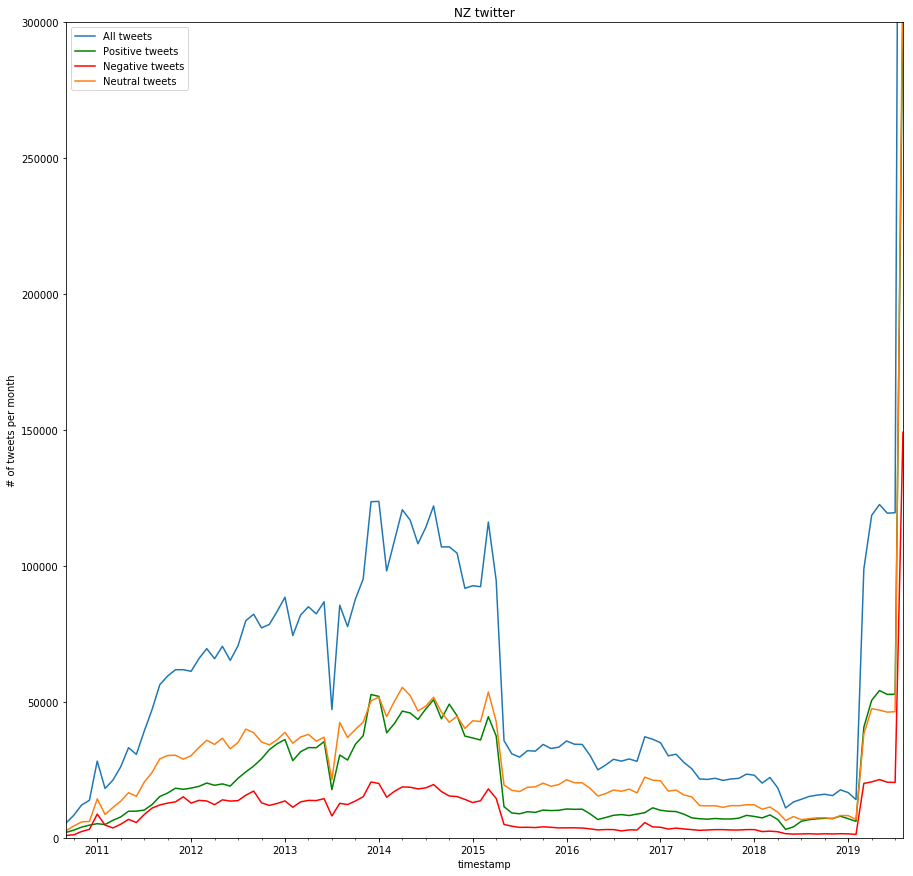

In [8]:
df.timestamp.resample("M").count().plot(figsize=(15,15), title="NZ twitter", ylim=(0,3e5))
df.timestamp[df["compound"] > 0.05].resample("M").count().plot(color='g')
df.timestamp[df["compound"] < -0.05].resample("M").count().plot(color='r')
df.timestamp[df["compound"].between(-.05, .05)].resample("M").count().plot()
plt.legend(["All tweets", "Positive tweets", "Negative tweets", "Neutral tweets"])
plt.ylabel("# of tweets per month")
plt.show()

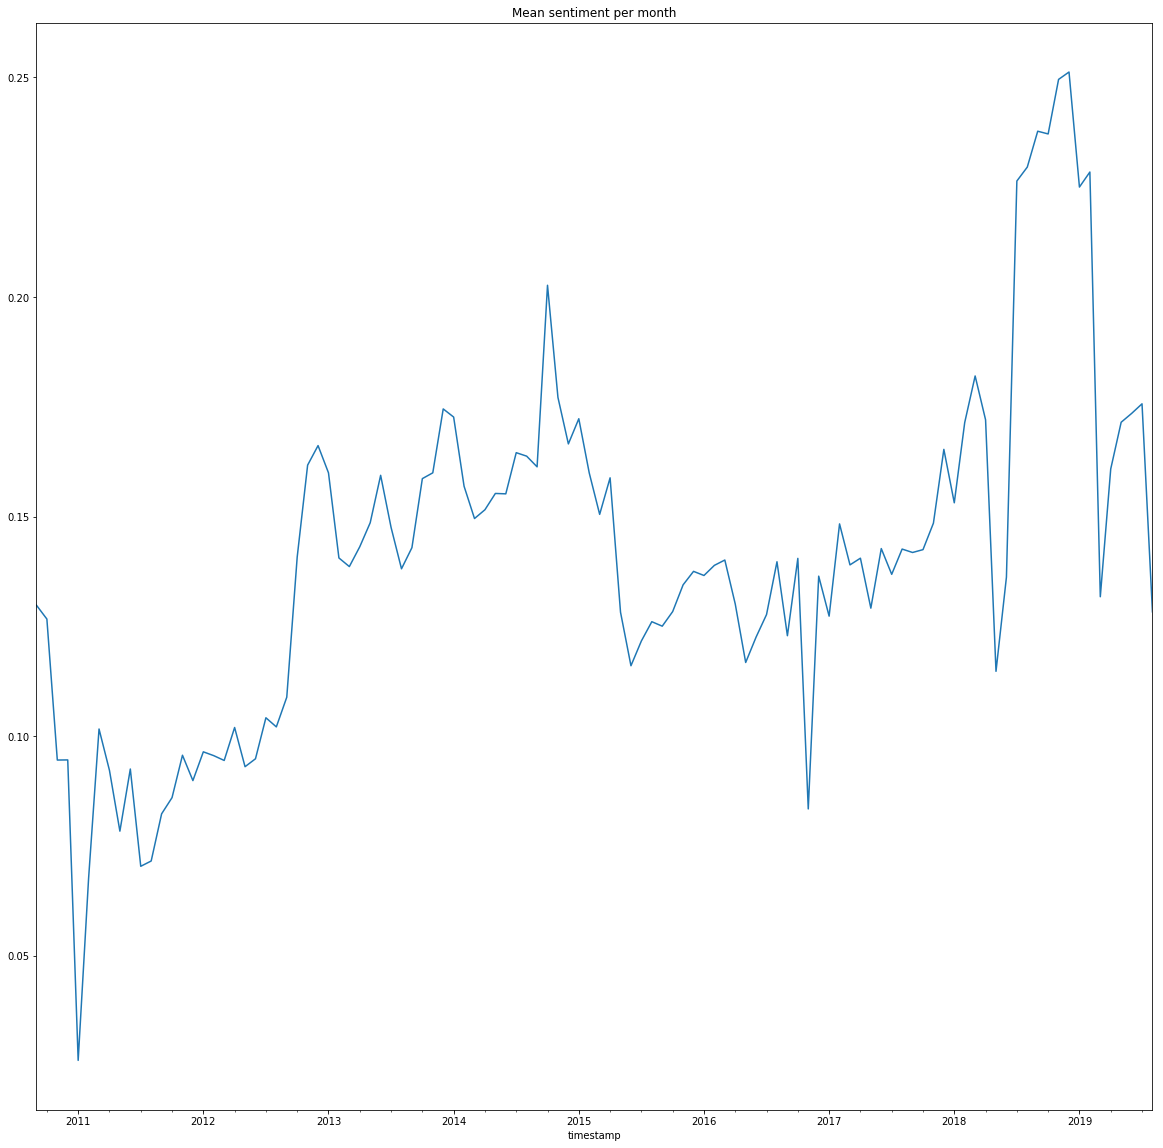

In [9]:
df["compound"].resample("M").mean().plot(figsize=(20,20), title="Mean sentiment per month")

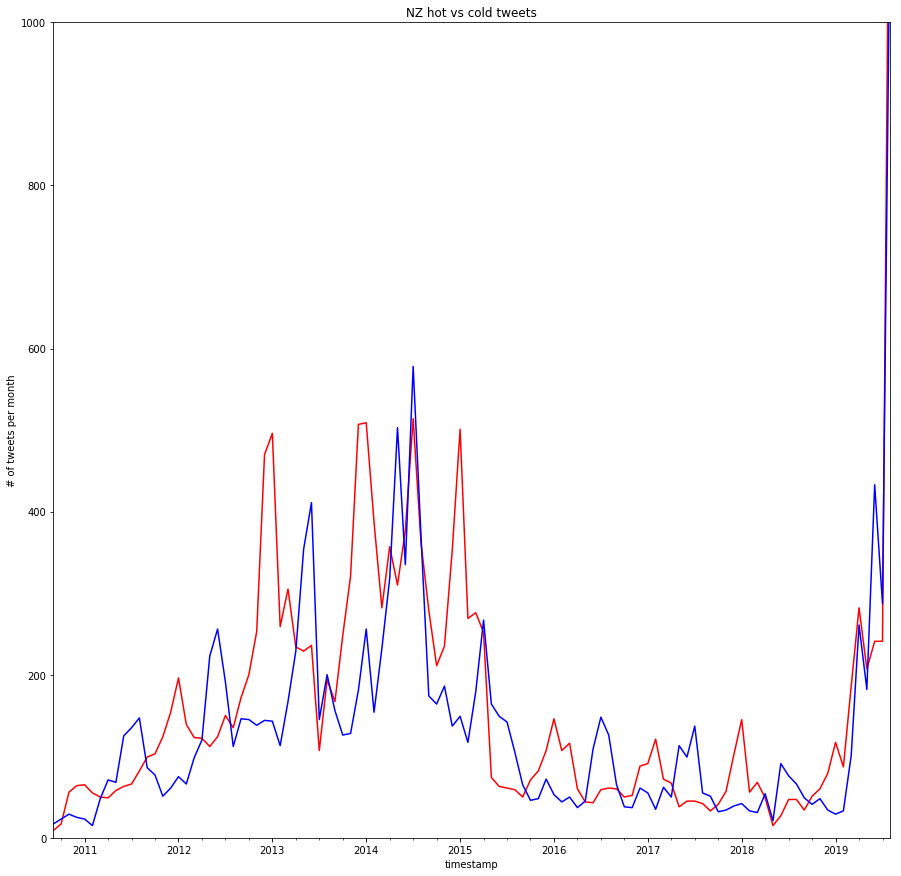

In [10]:
df.timestamp[df.text.str.contains(r"\bhot\b", na=False)].resample("M").count().plot(figsize=(15, 15), title="NZ hot vs cold tweets", color="r", ylim=(0,1000))
df.timestamp[df.text.str.contains(r"\bcold\b", na=False)].resample("M").count().plot(color="b")
plt.ylabel("# of tweets per month")
plt.show()

In [11]:
environmental_tweets = df[df.text.str.contains(r"global.?warming|climate.?chang|sea.?level.?ris|rising.?sea.?level|climate.?crisis|climate.?action|climate.?justice|climate.?emergency|Kyoto.?protocol|extreme.?weather|biodiversity|IPCC|Paris.?accord|just.?transition|low.?carbon|fossil.?fuel|greenhouse.?gas|zero.?carbon|carbon.?footprint", na=False)]
print(len(environmental_tweets))

4644


In [28]:
environmental_tweets["text_with_emoji_formatted"] = environmental_tweets.text_with_emoji.str.replace(pattern, lambda x: "<b>" + x.group() + "</b>", case=False)
show(environmental_tweets[["text_with_emoji_formatted", "compound"]],
    order=[[2, 'desc']],
    orderClasses=False,
    createdRow="""function( row, data, dataIndex ) {
      if (data[2] > 0) {
        $(row).css('background-color', 'rgba(0,255,0,.2)');
      } else {
        $(row).css('background-color', 'rgba(255,0,0,.2)');
      }
    }""")

,text_with_emoji_formatted,compound
timestamp,,


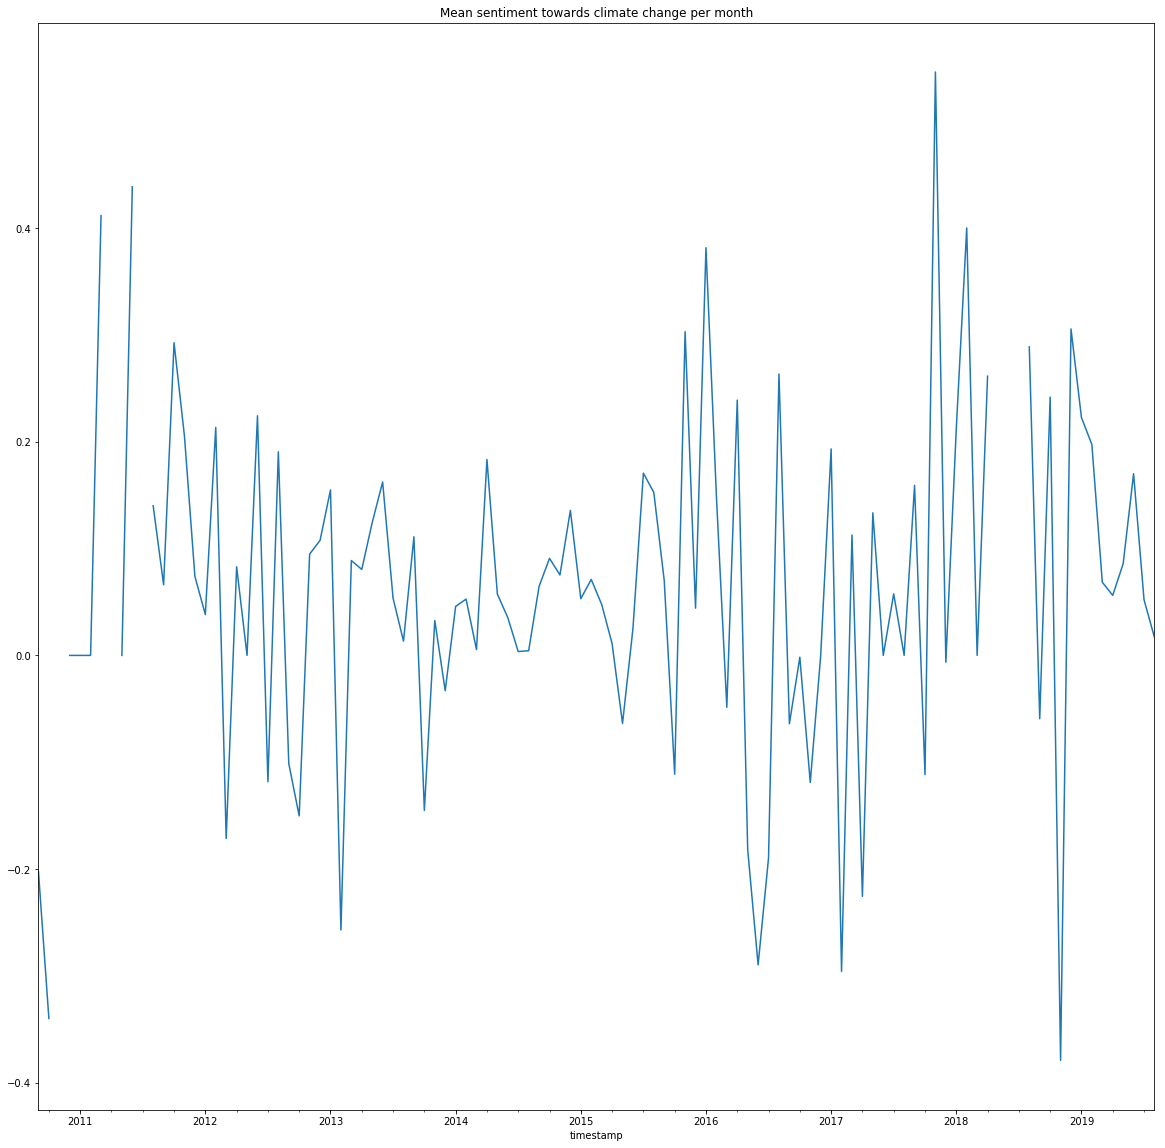

In [13]:
environmental_tweets["compound"].resample("M").mean().plot(figsize=(20,20), title="Mean sentiment towards climate change per month")

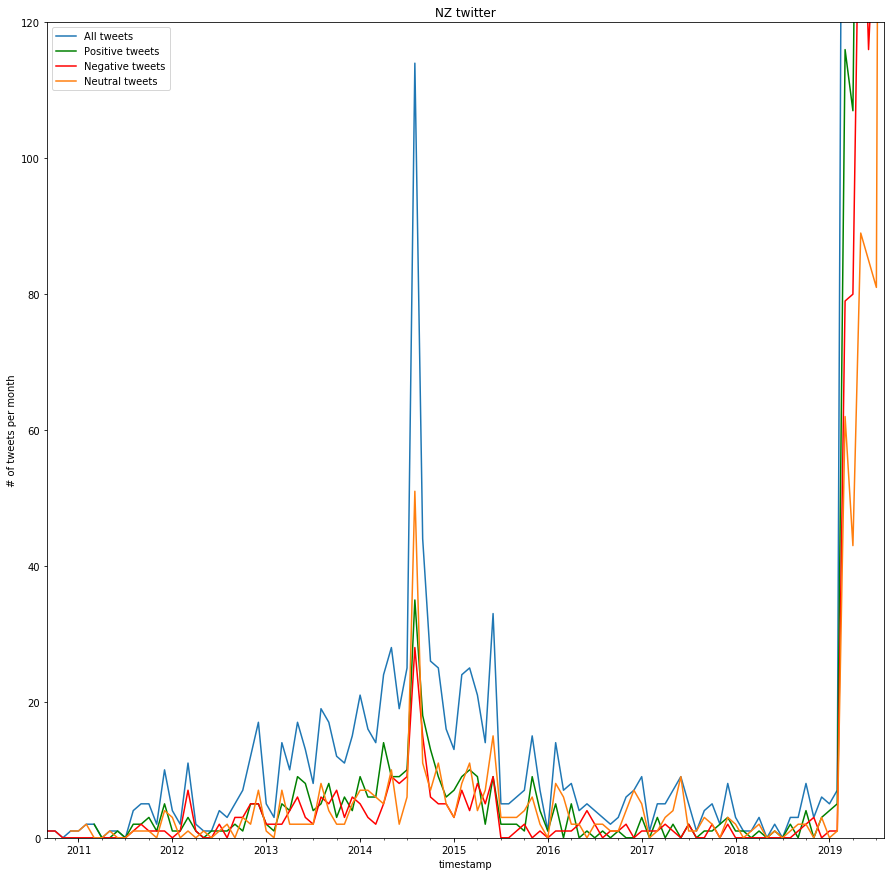

In [14]:
environmental_tweets.timestamp.resample("M").count().plot(figsize=(15,15), title="NZ twitter", ylim=(0, 120))
environmental_tweets.timestamp[environmental_tweets["compound"] > 0.05].resample("M").count().plot(color='g')
environmental_tweets.timestamp[environmental_tweets["compound"] < -0.05].resample("M").count().plot(color='r')
environmental_tweets.timestamp[environmental_tweets["compound"].between(-.05, .05)].resample("M").count().plot()
plt.legend(["All tweets", "Positive tweets", "Negative tweets", "Neutral tweets"])
plt.ylabel("# of tweets per month")
plt.show()